In [ ]:
# Analysis for my Master Thesis "Understanding the Adoption of Government-Backed Online Job Platforms for Repatriation: The Role of Innovation Attributes, Trust & Information Transparency
# Master of Science in Digital Marketing and Data Science, Emlyon Business School, Promotion 2026

In [124]:
# I import the libraries
import pandas as pd
import numpy as np 
import seaborn as sn
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [27]:
from scipy.stats import pearsonr

In [28]:
import pingouin as pg

In [111]:
df = pd.read_excel("Thesis_Survey_Data.xlsx")

In [112]:
df.head()

,RA1,RA2,RA3,Expected_Functionalities,CO1,CO2,CO3,CO4,OBS1,OBS2,...,TR5,AD1,AD2,AD3,Gender,Age_Group,Country,Years_Abroad,Occupation,Industry
0,4,2,4.0,Job postings and application tracking;Personal...,4,5,5,5,5,5,...,1,5,5,5,Male,Under 25,The Netherlands,1-2 years,"Professional (e.g., engineer, lawyer, doctor, ...",Financial and insurance activities
1,4,3,4.0,Personalized job recommendations based on skil...,3,4,4,4,3,4,...,3,4,4,5,Female,25-34,UK,3-5 years,"Professional (e.g., engineer, lawyer, doctor, ...",Human health and social work activities
2,3,4,4.0,Legal and administrative guidance (residence p...,4,4,4,4,4,4,...,2,4,3,3,Female,25-34,USA,3-5 years,Academic,Education
3,4,4,3.0,Job postings and application tracking;Job-rela...,4,4,4,5,4,4,...,3,4,4,5,Female,25-34,The Netherlands,6-10 years,"Professional (e.g., engineer, lawyer, doctor, ...",Manufacturing
4,3,4,4.0,Job postings and application tracking;Personal...,4,4,4,3,4,3,...,2,4,4,5,Male,25-34,Belgium,3-5 years,Manager/Executive,Wholesale and retail trade


In [31]:
# My dataframe consists of 144 rows and 30 columns
df.shape

(144, 30)

In [10]:
# Identifying null values and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   RA1                       144 non-null    int64  
 1   RA2                       144 non-null    int64  
 2   RA3                       144 non-null    float64
 3   Expected_Functionalities  144 non-null    object 
 4   CO1                       144 non-null    int64  
 5   CO2                       144 non-null    int64  
 6   CO3                       144 non-null    int64  
 7   CO4                       144 non-null    int64  
 8   OBS1                      144 non-null    int64  
 9   OBS2                      144 non-null    int64  
 10  OBS3                      144 non-null    int64  
 11  OBS4                      144 non-null    int64  
 12  IT1                       144 non-null    int64  
 13  IT2                       144 non-null    int64  
 14  IT3       

In [32]:
# Grouping survey items into constructs
Relative_Advantage = ["RA1","RA2","RA3"]
Compatibility = ["CO1","CO2","CO3", "CO4"]
Observability  = ["OBS1","OBS2","OBS3","OBS4"]
Information_Transparency   = ["IT1","IT2","IT3","IT4"]
Trust = ["TR1","TR2","TR3","TR4","TR5"]
Adoption_Intention = ["AD1","AD2","AD3"]

In [9]:
# PART A: Global Data Exploration & Descriptive Analytics

In [99]:
# Identifying numerical and categorical variables
num_columns = df.select_dtypes('number').columns
cat_columns = df.select_dtypes(exclude='number').columns
print("The Numerical columns are:", num_columns)
print("The Categorical columns are:", cat_columns)

The Numerical columns are: Index(['RA1', 'RA2', 'RA3', 'CO1', 'CO2', 'CO3', 'CO4', 'OBS1', 'OBS2', 'OBS3',
       'OBS4', 'IT1', 'IT2', 'IT3', 'IT4', 'TR1', 'TR2', 'TR3', 'TR4', 'TR5',
       'AD1', 'AD2', 'AD3', 'RA', 'CO', 'OBS', 'IT', 'TR', 'AD'],
      dtype='object')
The Categorical columns are: Index(['Expected_Functionalities', 'Gender', 'Age_Group', 'Country',
       'Years_Abroad', 'Occupation', 'Industry'],
      dtype='object')


In [51]:
## Descriptive Statistics for Categorical Variables

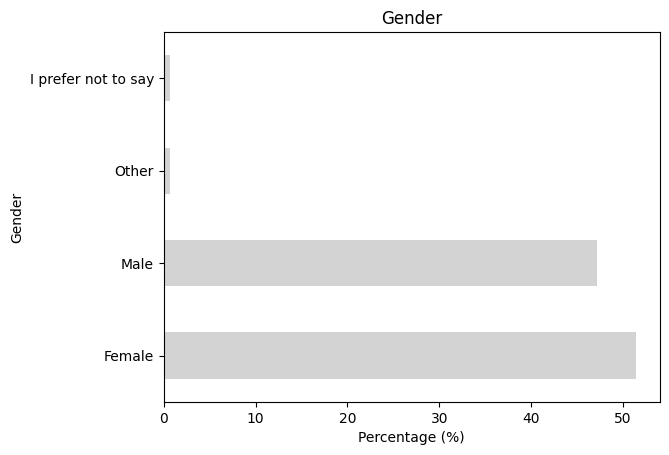

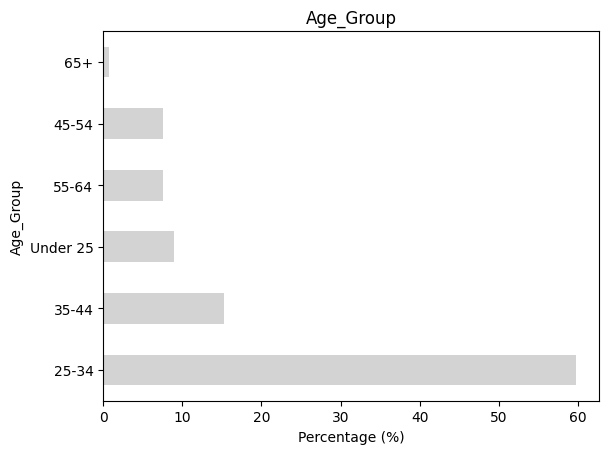

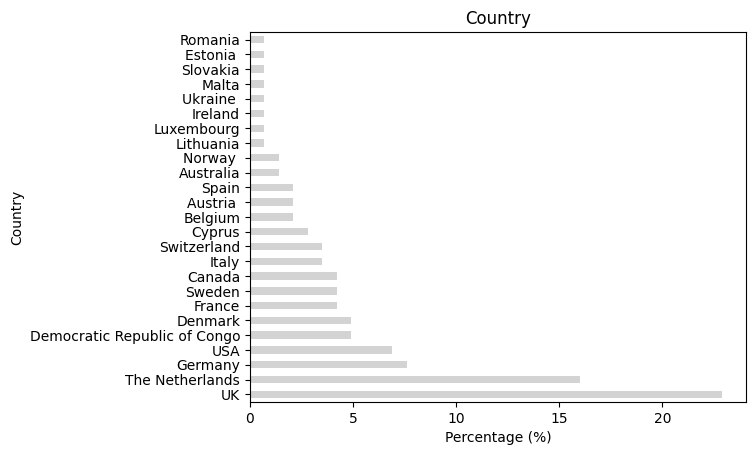

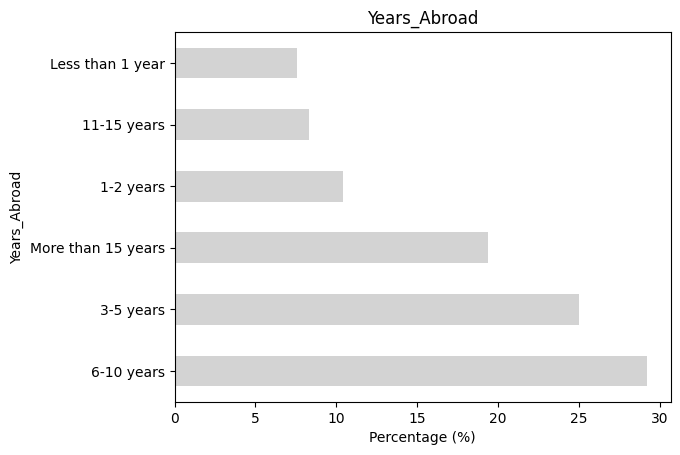

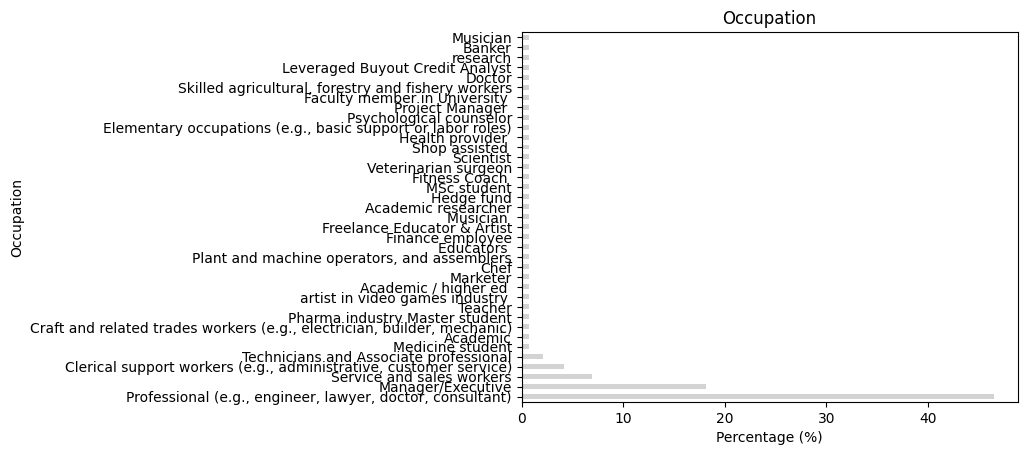

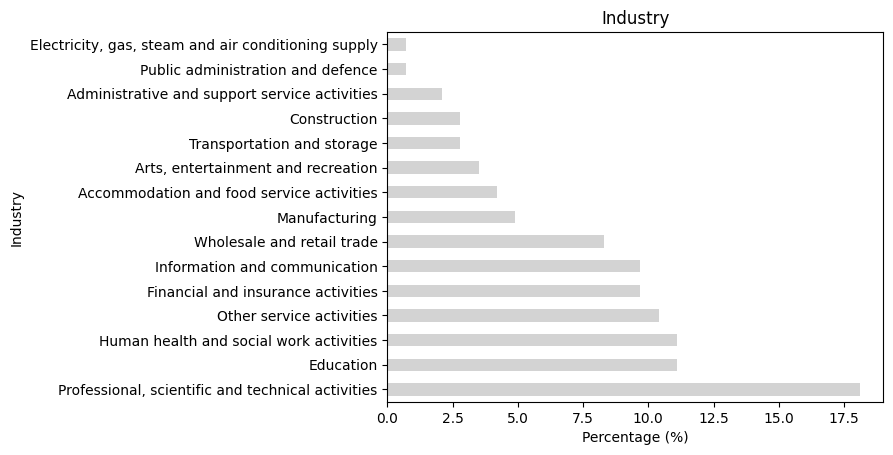

In [100]:
# Creating bar plots to  visualize categorical variables's distribution
for i in ['Gender', 'Age_Group', 'Country', 'Years_Abroad', 'Occupation', 'Industry']:
    percentage = df[i].value_counts(normalize=True) * 100  
    percentage = percentage.round(1)
    percentage.plot(kind="barh", color = "lightgray")
    plt.title(i)
    plt.ylabel(i)
    plt.xlabel("Percentage (%)")
    plt.show()

In [113]:
df["Country"].value_counts() # there are duplicate values

Country
UK                              33
The Netherlands                 23
USA                             10
Germany                          9
Democratic Republic of Congo     7
Italy                            5
Denmark                          5
Canada                           5
France                           4
Sweden                           4
Spain                            3
Belgium                          3
Austria                          3
Switzerland                      3
Switzerland                      2
Sweden                           2
France                           2
Cyprus                           2
Denmark                          2
Norway                           2
Germany                          2
Cyprus                           2
Lithuania                        1
Luxembourg                       1
Ireland                          1
Malta                            1
Slovakia                         1
Canada                           1
Ukraine     

In [114]:
# Unique Country names 
df["Country"].unique()

array(['The Netherlands', 'UK', 'USA', 'Belgium',
       'Democratic Republic of Congo', 'France ', 'Lithuania', 'Germany',
       'Italy', 'Switzerland', 'Switzerland ', 'Denmark', 'Austria ',
       'Spain', 'France', 'Sweden', 'Sweden ', 'Canada', 'Denmark ',
       'Luxembourg', 'Ireland', 'Ukraine ', 'Canada ', 'Slovakia',
       'Malta', 'Germany ', 'Norway ', 'Cyprus ', 'Estonia ', 'Cyprus',
       'Australia', 'Australia ', 'Romania'], dtype=object)

In [115]:
# Removing the extra space (" ") in some of the country names 
countries = {
    "Australia ": "Australia",
    "Canada ": "Canada",
    "Cyprus ": "Cyprus",
    "Denmark ": "Denmark",
    "France ": "France",
    "Germany ": "Germany",
    "Switzerland " : "Switzerland",
    "Sweden " : "Sweden"
}
df["Country"] = df["Country"].replace(countries)

In [116]:
df["Country"].unique()

array(['The Netherlands', 'UK', 'USA', 'Belgium',
       'Democratic Republic of Congo', 'France', 'Lithuania', 'Germany',
       'Italy', 'Switzerland', 'Denmark', 'Austria ', 'Spain', 'Sweden',
       'Canada', 'Luxembourg', 'Ireland', 'Ukraine ', 'Slovakia', 'Malta',
       'Norway ', 'Cyprus', 'Estonia ', 'Australia', 'Romania'],
      dtype=object)

In [117]:
df["Country"].value_counts()

Country
UK                              33
The Netherlands                 23
Germany                         11
USA                             10
Democratic Republic of Congo     7
Denmark                          7
France                           6
Sweden                           6
Canada                           6
Italy                            5
Switzerland                      5
Cyprus                           4
Belgium                          3
Austria                          3
Spain                            3
Australia                        2
Norway                           2
Lithuania                        1
Luxembourg                       1
Ireland                          1
Ukraine                          1
Malta                            1
Slovakia                         1
Estonia                          1
Romania                          1
Name: count, dtype: int64

In [103]:
# Top 5 host countries in sample population
df["Country"].value_counts().head(5)

Country
UK                              33
The Netherlands                 23
Germany                         11
USA                             10
Democratic Republic of Congo     7
Name: count, dtype: int64

In [92]:
df["Country"].value_counts().sum()

np.int64(144)

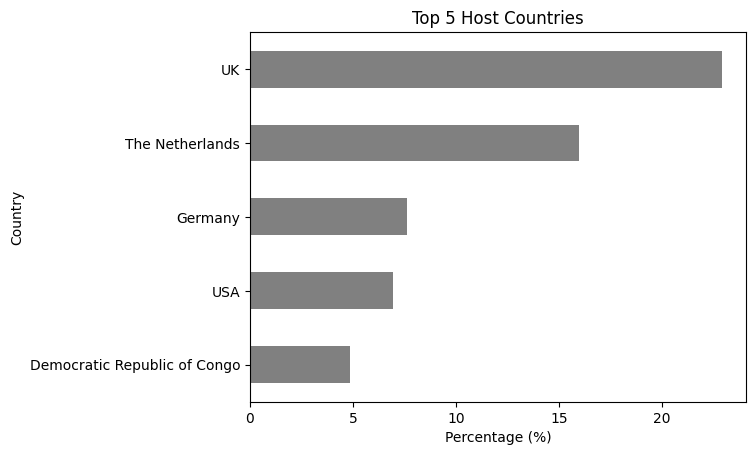

In [93]:
# Horizontal Bar Chart: Top 5 Host Countries 
df["Country"].value_counts(normalize = True).head(5).mul(100).sort_values().plot(kind='barh', color = "gray");
plt.title("Top 5 Host Countries");
plt.xlabel("Percentage (%)");

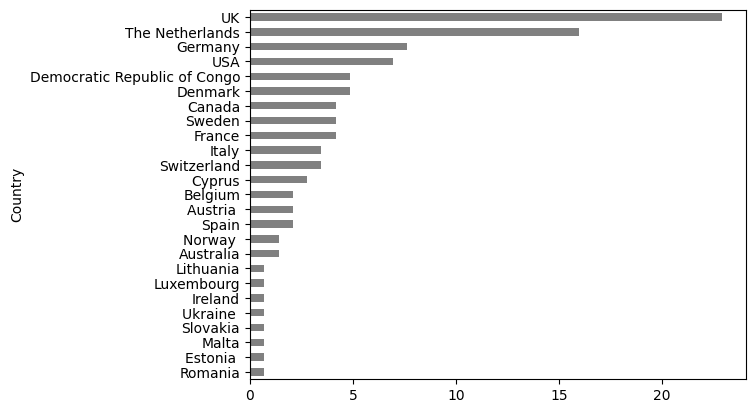

In [104]:
# Breakdown of Host Countries of entire sample population
df["Country"].value_counts(normalize = True).mul(100).sort_values().plot(kind='barh', color = "gray");

In [42]:
# Gender Distribution
df["Gender"].value_counts()

Gender
Female                 74
Male                   68
Other                   1
I prefer not to say     1
Name: count, dtype: int64

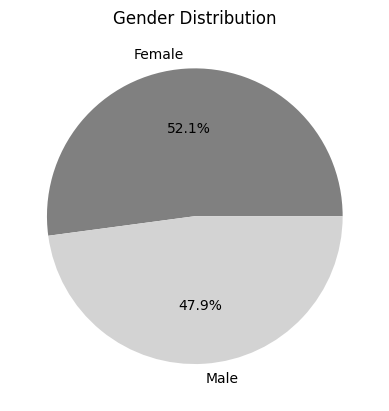

In [41]:
# Graphical representation of Gender distribution (Male vs Female)
df[df["Gender"].isin(["Male", "Female"])]["Gender"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gray', 'lightgray', 'darkgray'])
plt.ylabel('')
plt.title("Gender Distribution")
plt.show()

In [53]:
# Age distribution
df["Age_Group"].value_counts()

Age_Group
25-34       86
35-44       22
Under 25    13
55-64       11
45-54       11
65+          1
Name: count, dtype: int64

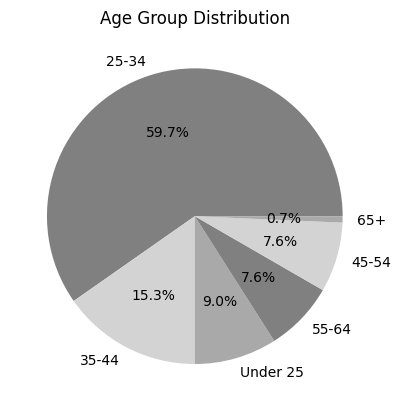

In [60]:
# Graphical representation of Age Group distribution
df["Age_Group"].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['gray', 'lightgray', 'darkgray'])
plt.ylabel('')
plt.title("Age Group Distribution")
plt.show()

In [67]:
# Years_Abroad Distribution
df["Years_Abroad"].value_counts()

Years_Abroad
6-10 years            42
3-5 years             36
More than 15 years    28
1-2 years             15
11-15 years           12
Less than 1 year      11
Name: count, dtype: int64

In [ ]:
# Occupation Distribution

In [42]:
df["Occupation"].value_counts()

Occupation
Professional (e.g., engineer, lawyer, doctor, consultant)                  67
Manager/Executive                                                          26
Service and sales workers                                                  10
Clerical support workers (e.g., administrative, customer service)           6
Technicians and Associate professional                                      3
Medicine student                                                            1
Academic                                                                    1
Craft and related trades workers (e.g., electrician, builder, mechanic)     1
Pharma industry Master student                                              1
Teacher                                                                     1
artist in video games industry                                              1
Academic / higher ed                                                        1
Marketer                                             

In [81]:
df["Occupation"].value_counts().head(4)

Occupation
Professional (e.g., engineer, lawyer, doctor, consultant)            67
Manager/Executive                                                    26
Service and sales workers                                            10
Clerical support workers (e.g., administrative, customer service)     6
Name: count, dtype: int64

In [73]:
df["Occupation"].value_counts(normalize = True).head(5).mul(100)

Occupation
Professional (e.g., engineer, lawyer, doctor, consultant)            46.527778
Manager/Executive                                                    18.055556
Service and sales workers                                             6.944444
Clerical support workers (e.g., administrative, customer service)     4.166667
Technicians and Associate professional                                2.083333
Name: proportion, dtype: float64

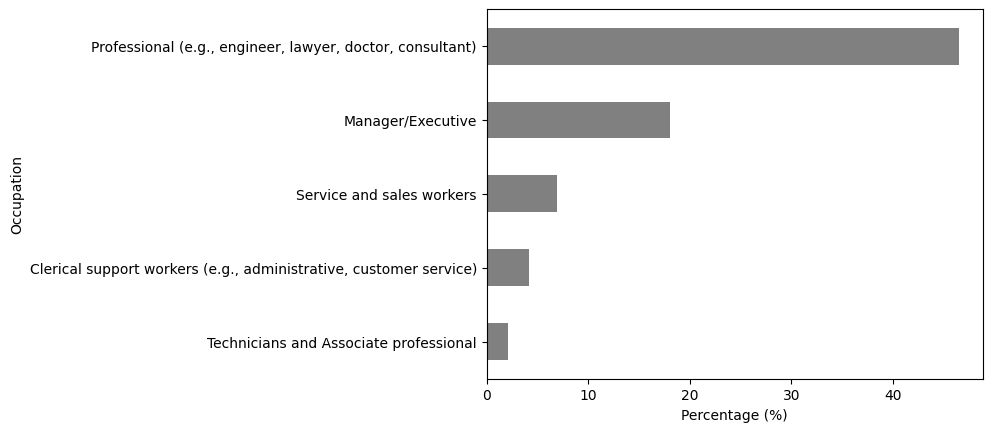

In [43]:
df["Occupation"].value_counts(normalize = True).head(5).mul(100).sort_values().plot(kind="barh", color="gray");
plt.xlabel("Percentage (%)");

In [ ]:
# Industry Distribution

In [83]:
df["Industry"].value_counts()

Industry
Professional, scientific and technical activities      26
Education                                              16
Human health and social work activities                16
Other service activities                               15
Financial and insurance activities                     14
Information and communication                          14
Wholesale and retail trade                             12
Manufacturing                                           7
Accommodation and food service activities               6
Arts, entertainment and recreation                      5
Transportation and storage                              4
Construction                                            4
Administrative and support service activities           3
Public administration and defence                       1
Electricity, gas, steam and air conditioning supply     1
Name: count, dtype: int64

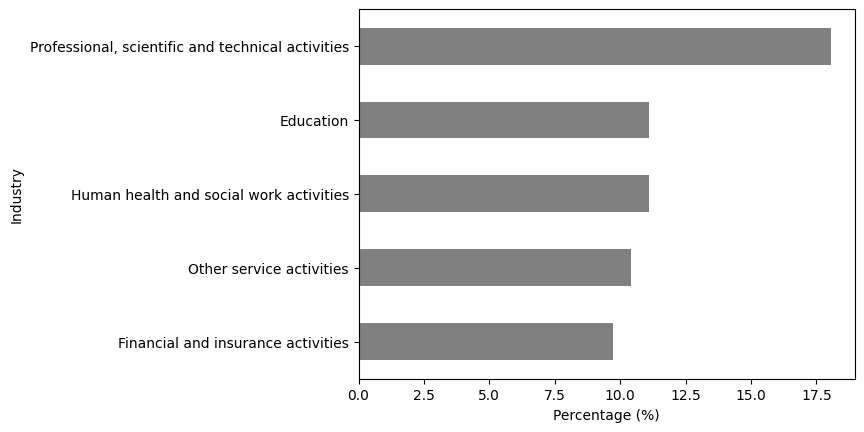

In [84]:
df["Industry"].value_counts(normalize = True).head(5).mul(100).sort_values().plot(kind="barh", color="gray");
plt.xlabel("Percentage (%)");

In [ ]:
# Expected Functionalities (what functionalities Greek diaspora expects to see in diaspora repatriation platforms)

In [86]:
df["Expected_Functionalities"].value_counts().head(5)

Expected_Functionalities
Job postings and application tracking;Personalized job recommendations based on skills;Job-related information such as salaries, employment conditions, and career development opportunities;Information about relocation (housing, taxation, healthcare, etc.);Networking opportunities with professionals in Greece;Mentorship or advisory programs;Repatriation grants or funding information;Legal and administrative guidance (residence permits, social security, etc.);Integration and community events;Success stories or testimonials from returnees;Information and updates about R&D activities in my sector    7
Job postings and application tracking;Personalized job recommendations based on skills;Job-related information such as salaries, employment conditions, and career development opportunities;Information about relocation (housing, taxation, healthcare, etc.);Networking opportunities with professionals in Greece                                                             

In [89]:
Expected_functionalities_split = df["Expected_Functionalities"].str.split(";").explode().str.strip()
Expected_functionalities_split

0                  Job postings and application tracking
0       Personalized job recommendations based on skills
0      Job-related information such as salaries, empl...
0      Information about relocation (housing, taxatio...
0             Repatriation grants or funding information
                             ...                        
143                Job postings and application tracking
143     Personalized job recommendations based on skills
143    Job-related information such as salaries, empl...
143    Networking opportunities with professionals in...
143                      Mentorship or advisory programs
Name: Expected_Functionalities, Length: 771, dtype: object

In [91]:
# Top 10 Expected Functionalities
Expected_functionalities_split.value_counts().head(10)

Expected_Functionalities
Personalized job recommendations based on skills                                                         117
Job postings and application tracking                                                                    116
Job-related information such as salaries, employment conditions, and career development opportunities    112
Information about relocation (housing, taxation, healthcare, etc.)                                        85
Repatriation grants or funding information                                                                73
Networking opportunities with professionals in Greece                                                     72
Legal and administrative guidance (residence permits, social security, etc.)                              65
Information and updates about R&D activities in my sector                                                 37
Integration and community events                                                                       

C:\Users\User\AppData\Local\Temp\ipykernel_6948\2915504064.py:7: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


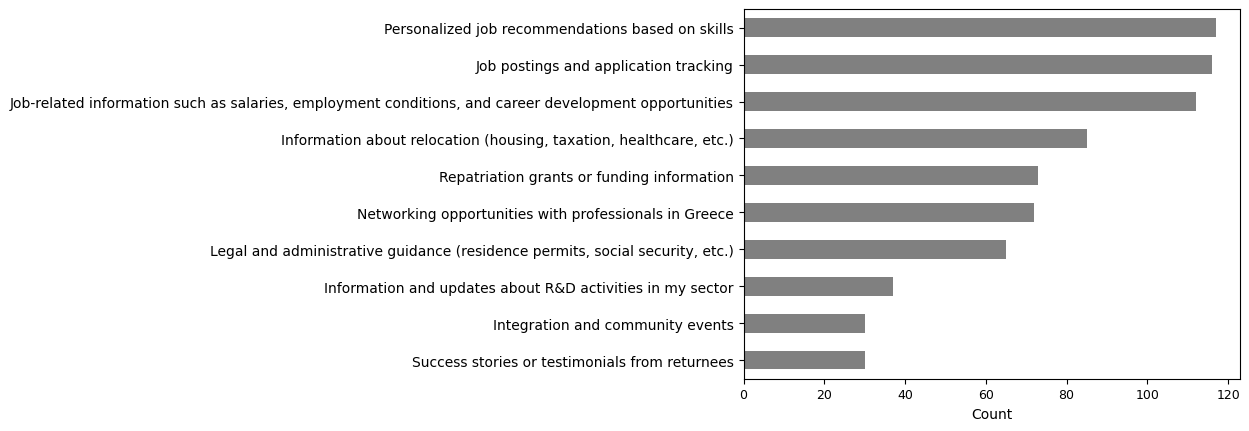

In [122]:
# Bar chart: Top 10 Expected Funtionalities
Expected_functionalities_split.value_counts().head(10).sort_values().plot(kind="barh", color="gray");
plt.xlabel("Count");
plt.ylabel("");
plt.xticks(fontsize=9)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()
# This validates the regression result that Observability is the least significant adoption driver

In [104]:
# Data Exploration for Quantitative Variables

In [135]:
# Statistics for Quantitative Variables
# Relative Advantage
df[Relative_Advantage].agg(["count","mean","std","min","max","median"]).round(2)

,RA1,RA2,RA3
count,144.00,144.00,144.00
mean,3.55,3.38,3.57
std,0.99,1.03,1.02
min,1.00,1.00,1.00
max,5.00,5.00,5.00
median,4.00,3.00,4.00


In [136]:
# Compatibility
df[Compatibility].agg(["count","mean","std","min","max","median"]).round(2)

,CO1,CO2,CO3,CO4
count,144.00,144.00,144.00,144.00
mean,3.58,3.60,4.05,3.74
std,1.07,1.02,1.05,1.02
min,1.00,1.00,1.00,1.00
max,5.00,5.00,5.00,5.00
median,4.00,4.00,4.00,4.00


In [137]:
# Observability
df[Observability].agg(["count","mean","std","min","max","median"]).round(2)

,OBS1,OBS2,OBS3,OBS4
count,144.00,144.00,144.00,144.00
mean,3.72,3.83,2.16,4.04
std,1.04,1.19,1.35,0.96
min,1.00,1.00,1.00,1.00
max,5.00,5.00,5.00,5.00
median,4.00,4.00,2.00,4.00


In [139]:
# Information Transparency
df[Information_Transparency].agg(["count","mean","std","min","max","median"]).round(2)

,IT1,IT2,IT3,IT4
count,144.00,144.00,144.00,144.00
mean,4.52,4.51,3.85,4.31
std,0.70,0.77,1.07,0.83
min,1.00,1.00,1.00,1.00
max,5.00,5.00,5.00,5.00
median,5.00,5.00,4.00,5.00


In [141]:
# Trust
df[Trust].agg(["count","mean","std","min","max","median"]).round(2)

,TR1,TR2,TR3,TR4,TR5
count,144.00,144.00,144.00,144.00,144.00
mean,2.95,3.33,3.17,3.11,2.64
std,1.19,1.11,1.25,1.03,1.16
min,1.00,1.00,1.00,1.00,1.00
max,5.00,5.00,5.00,5.00,5.00
median,3.00,3.00,3.00,3.00,3.00


In [143]:
# Adoption Intention
df[Adoption_Intention].agg(["count","mean","std","min","max","median"]).round(2)

,AD1,AD2,AD3
count,144.00,144.00,144.00
mean,3.59,3.61,3.79
std,1.01,0.99,0.99
min,1.00,1.00,1.00
max,5.00,5.00,5.00
median,4.00,4.00,4.00


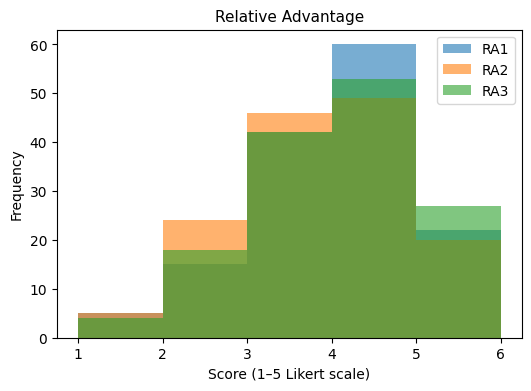

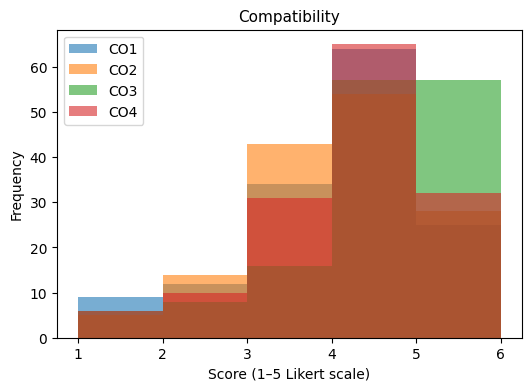

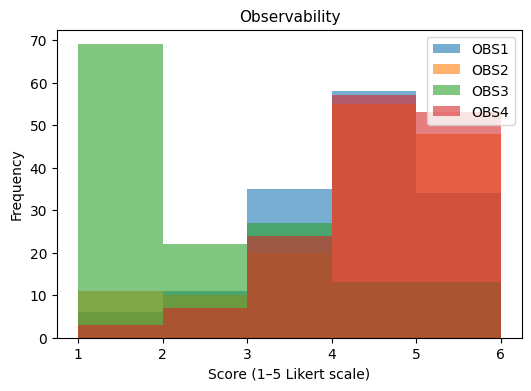

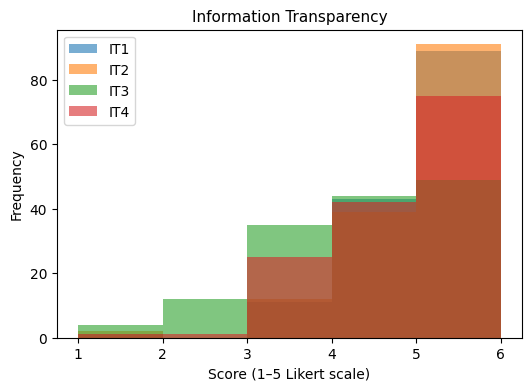

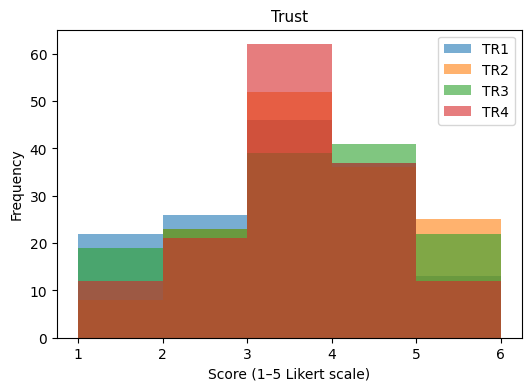

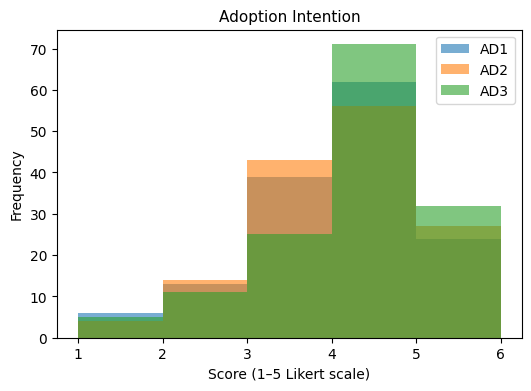

In [44]:
# Histograms
constructs = {
    "Relative Advantage": ['RA1', 'RA2', 'RA3'],
    "Compatibility": ['CO1', 'CO2', 'CO3', 'CO4'],
    "Observability": ['OBS1', 'OBS2', 'OBS3', 'OBS4'],
    "Information Transparency": ['IT1', 'IT2', 'IT3', 'IT4'],
    "Trust": ['TR1', 'TR2', 'TR3', 'TR4'],
    "Adoption Intention": ['AD1', 'AD2', 'AD3']
}

for name, items in constructs.items():
    df[items].plot(kind='hist', bins=[1, 2, 3, 4, 5, 6], alpha=0.6, figsize=(6,4))
    plt.title(f"{name}", fontsize=11)
    plt.xlabel("Score (1–5 Likert scale)")
    plt.ylabel("Frequency")
    plt.legend(items)
    plt.grid(False)
    plt.show()

In [19]:
# Reliability Testing: Cronbach Alpha Coefficient

In [49]:
def alpha(items):
    a, _ = pg.cronbach_alpha(df[items])
    return round(a,3)
    
for name, items in {
    "Relative_Advantage": Relative_Advantage, "Compatibility": Compatibility, "Observability": Observability,
    "Information_Transparency": Information_Transparency, "Trust": Trust, "Adoption_Intention": Adoption_Intention
}.items():
    print(name, "alpha =", alpha(items))

Relative_Advantage alpha = 0.901
Compatibility alpha = 0.876
Observability alpha = 0.604
Information_Transparency alpha = 0.736
Trust alpha = 0.873
Adoption_Intention alpha = 0.866


In [51]:
pg.cronbach_alpha(df[Observability]) #cronbach alpha's array

(np.float64(0.6042312365909439), array([0.487, 0.7  ]))

In [54]:
# Identifying which item under the Observability construct has the lowest internal consistency
for i in Observability:
    alpha, _ = pg.cronbach_alpha(df[Observability].drop(columns=i))
    print(f"If {i} is dropped: α = {alpha:.3f}")

If OBS1 is dropped: α = 0.480
If OBS2 is dropped: α = 0.396
If OBS3 is dropped: α = 0.685
If OBS4 is dropped: α = 0.548


In [55]:
Observability_New = ["OBS1", "OBS2", "OBS4"] # Removing OBS3 from the Observability list

def alpha(items):
    a, _ = pg.cronbach_alpha(df[items])
    return round(a,3)

for name, items in {
    "Relative_Advantage": Relative_Advantage, "Compatibility": Compatibility, "Observability": Observability_New,
    "Information_Transparency": Information_Transparency, "Trust": Trust, "Adoption_Intention": Adoption_Intention
}.items():
    print(name, "alpha =", alpha(items))

Relative_Advantage alpha = 0.901
Compatibility alpha = 0.876
Observability alpha = 0.685
Information_Transparency alpha = 0.736
Trust alpha = 0.873
Adoption_Intention alpha = 0.866


In [56]:
df_new = df.drop(columns=["OBS3"]) # Creating a new Dataframe to not ruin my previous code which included OBS3 

In [57]:
# Checking if OBS3 was successfully removed
df_new.columns

Index(['RA1', 'RA2', 'RA3', 'Expected_Functionalities', 'CO1', 'CO2', 'CO3',
       'CO4', 'OBS1', 'OBS2', 'OBS4', 'IT1', 'IT2', 'IT3', 'IT4', 'TR1', 'TR2',
       'TR3', 'TR4', 'TR5', 'AD1', 'AD2', 'AD3', 'Gender', 'Age_Group',
       'Country', 'Years_Abroad', 'Occupation', 'Industry'],
      dtype='object')

In [58]:
# Factor Analysis
from factor_analyzer import FactorAnalyzer
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

In [69]:
# Calculating Bartlett's test of sphericity
items = ['RA1','RA2','RA3','CO1','CO2','CO3','CO4',
          'OBS1','OBS2','OBS4','IT1','IT2','IT3','IT4',
          'TR1','TR2','TR3','TR4','AD1','AD2','AD3']
    
chi_square_value,p_value=calculate_bartlett_sphericity(df[items])
print(f"The chi_square_value is:", chi_square_value, "and the p_value is:", p_value)

# Calculating KMO
kmo_all,kmo_model=calculate_kmo(df_new[items])
print(f"The KMO is:", kmo_model)

The chi_square_value is: 2043.6237807664388 and the p_value is: 1.7421337806839013e-297
The KMO is: 0.9334835865629187


In [70]:
# Pearson Correlation Matrix
corr_matrix = df_new[items].corr(method='pearson')
print(corr_matrix)

           RA1       RA2       RA3       CO1       CO2       CO3       CO4  \
RA1   1.000000  0.774396  0.733042  0.489906  0.560937  0.572091  0.552515   
RA2   0.774396  1.000000  0.749721  0.564908  0.593139  0.485067  0.535190   
RA3   0.733042  0.749721  1.000000  0.528893  0.566402  0.510593  0.508685   
CO1   0.489906  0.564908  0.528893  1.000000  0.654229  0.559130  0.706749   
CO2   0.560937  0.593139  0.566402  0.654229  1.000000  0.623956  0.696298   
CO3   0.572091  0.485067  0.510593  0.559130  0.623956  1.000000  0.593554   
CO4   0.552515  0.535190  0.508685  0.706749  0.696298  0.593554  1.000000   
OBS1  0.553302  0.544480  0.497426  0.583952  0.569190  0.515931  0.577866   
OBS2  0.509494  0.487436  0.400646  0.465380  0.552722  0.441766  0.437136   
OBS4  0.233756  0.245271  0.243310  0.153537  0.303106  0.323062  0.204747   
IT1   0.362785  0.323507  0.362815  0.264588  0.394362  0.354610  0.416198   
IT2   0.331939  0.301961  0.318845  0.294139  0.361596  0.324424

In [72]:
# Correlation between constructs

df_new["RA"] = df_new[["RA1","RA2","RA3"]].mean(axis=1)
df_new["CO"] = df_new[["CO1","CO2","CO3"]].mean(axis=1)
df_new["OBS"] = df_new[["OBS1","OBS2","OBS4"]].mean(axis=1)  # I don't take OBS3 into account 
df_new["IT"] = df_new[["IT1","IT2","IT3","IT4"]].mean(axis=1)
df_new["TR"] = df_new[["TR1","TR2","TR3","TR4"]].mean(axis=1)
df_new["AD"] = df_new[["AD1","AD2","AD3"]].mean(axis=1)
corr = df_new[["CO","RA","OBS","IT","TR","AD"]].corr().round(3)
corr

,CO,RA,OBS,IT,TR,AD
CO,1.000,0.688,0.651,0.620,0.573,0.813
RA,0.688,1.000,0.584,0.595,0.634,0.676
OBS,0.651,0.584,1.000,0.642,0.536,0.629
IT,0.620,0.595,0.642,1.000,0.463,0.629
TR,0.573,0.634,0.536,0.463,1.000,0.667
AD,0.813,0.676,0.629,0.629,0.667,1.000


In [73]:
# Exploratory Factor Analysis
from factor_analyzer.factor_analyzer import FactorAnalyzer 
factor_analysis = FactorAnalyzer(n_factors=6, rotation='varimax') # 6 factors
factor_analysis.fit(df_new[items])
loadings = pd.DataFrame(factor_analysis.loadings_, index=items)
print(loadings.round(3))

          0      1      2      3      4      5
RA1   0.380  0.262  0.715  0.191  0.170 -0.042
RA2   0.326  0.373  0.706  0.205  0.118  0.066
RA3   0.360  0.258  0.660  0.235  0.080  0.115
CO1   0.724  0.239  0.234  0.153  0.063  0.000
CO2   0.653  0.272  0.247  0.302  0.191  0.039
CO3   0.626  0.142  0.260  0.203  0.201  0.105
CO4   0.720  0.202  0.208  0.337  0.019 -0.097
OBS1  0.508  0.328  0.271  0.254  0.193 -0.109
OBS2  0.368  0.245  0.215  0.177  0.624 -0.065
OBS4  0.066  0.071  0.057  0.377  0.601  0.107
IT1   0.160  0.073  0.138  0.767  0.100 -0.031
IT2   0.236 -0.041  0.131  0.626  0.181  0.100
IT3   0.310  0.438  0.243  0.279  0.112 -0.063
IT4   0.328  0.228  0.182  0.548  0.271  0.075
TR1   0.246  0.760  0.102 -0.034  0.185 -0.012
TR2   0.292  0.798  0.186  0.127  0.104 -0.043
TR3   0.122  0.754  0.276  0.071 -0.028  0.203
TR4   0.455  0.505  0.347  0.026  0.288  0.148
AD1   0.689  0.275  0.232  0.142  0.188  0.242
AD2   0.590  0.437  0.277  0.162  0.161  0.207
AD3   0.525  

C:\Users\User\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


In [74]:
#Total Variance explained by the factors
variance = factor_analysis.get_factor_variance()
print(variance)

(array([4.39178098, 3.27312867, 2.32080546, 2.20722821, 1.27011944,
       0.47529183]), array([0.20913243, 0.15586327, 0.11051455, 0.10510611, 0.06048188,
       0.02263294]), array([0.20913243, 0.3649957 , 0.47551024, 0.58061635, 0.64109823,
       0.66373117]))


In [ ]:
# HYPOTHESIS TESTING

In [75]:
import statsmodels.api as sm

In [76]:
# Testing Hypotheses H1a-c

X = df_new[['RA','CO', 'OBS']]
y = df_new['AD']

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     AD   R-squared:                       0.696
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     98.78
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           2.17e-34
Time:                        21:44:23   Log-Likelihood:                -100.34
No. Observations:                 144   AIC:                             208.7
Df Residuals:                     140   BIC:                             220.6
Df Model:                           3                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3098      0.223      1.387      0.1

In [270]:
# Testing Hypotheses H2

X = df_new['IT']
y = df_new['TR']

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     TR   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     42.71
Date:                Sat, 01 Nov 2025   Prob (F-statistic):           1.06e-09
Time:                        21:33:44   Log-Likelihood:                -183.12
No. Observations:                 144   AIC:                             370.2
Df Residuals:                     142   BIC:                             376.2
Df Model:                           1                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0958      0.460      0.208      0.8

In [77]:
# Testing H3 & H4
X = df_new[['RA','CO','OBS','IT','TR']]
y = df_new['AD']

X = sm.add_constant(X)  
model = sm.OLS(y, X).fit(cov_type='HC3')
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     AD   R-squared:                       0.738
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     63.79
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           3.44e-34
Time:                        21:44:41   Log-Likelihood:                -89.707
No. Observations:                 144   AIC:                             191.4
Df Residuals:                     138   BIC:                             209.2
Df Model:                           5                                         
Covariance Type:                  HC3                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0904      0.408     -0.221      0.8

In [78]:
# Mediation analysis # Testing Hypothesis H5
mediation = pg.mediation_analysis(data=df_new, x="IT", m="TR", y="AD")
print(mediation)

       path      coef        se          pval  CI[2.5%]  CI[97.5%]  sig
0    TR ~ X  0.708202  0.113878  5.271482e-09  0.483087   0.933317  Yes
1    Y ~ TR  0.603026  0.056580  7.487313e-20  0.491177   0.714875  Yes
2     Total  0.871571  0.090285  2.905563e-17  0.693094   1.050048  Yes
3    Direct  0.565574  0.085691  7.719059e-10  0.396170   0.734979  Yes
4  Indirect  0.305997  0.065845  0.000000e+00  0.200289   0.450765  Yes


In [ ]:
# MODEL COMPARISONS

In [272]:
# UNIVARIATE REGRESSION MODELS

In [79]:
y = df_new["AD"]  # Adoption Intention is the dependent variable

# Univariate models
for var in ["RA", "CO", "OBS", "IT", "TR"]:
    X = sm.add_constant(df_new[[var]])     
    model = sm.OLS(y, X).fit()         
    print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                     AD   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.453
Method:                 Least Squares   F-statistic:                     119.5
Date:                Sun, 02 Nov 2025   Prob (F-statistic):           1.45e-20
Time:                        21:45:01   Log-Likelihood:                -142.05
No. Observations:                 144   AIC:                             288.1
Df Residuals:                     142   BIC:                             294.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4073      0.214      6.591      0.0

In [ ]:
# DESCRIPTIVE ANALYSIS FOR QUALITATIVE VARIABLES

In [80]:
import scipy.stats as stats

categorical_variables = [
    "Gender", "Age_Group", "Occupation",
    "Industry", "Years_Abroad", "Expected_Functionalities", "Country"
]

dependent_var = "AD"  

results = []

for i in categorical_variables:
    table = pd.crosstab(df_new[i], df_new[dependent_var])
    chi2, p, dof, expected = stats.chi2_contingency(table)
    results.append([i, chi2, dof, p])

summary = pd.DataFrame(results, columns=["Variable", "Chi-square", "df", "p-value"])
print(summary)

                   Variable   Chi-square    df   p-value
0                    Gender    30.912546    36  0.709100
1                 Age_Group    46.274058    60  0.903475
2                Occupation   378.901988   432  0.968792
3                  Industry   186.477276   168  0.156410
4              Years_Abroad    51.550708    60  0.773122
5  Expected_Functionalities  1309.638974  1272  0.225968
6                   Country   257.882058   300  0.962436


In [125]:
# Contingency tables
# Divide AD into 3 fixed groups (1–2.33 = Low, 2.34–3.66 = Medium, 3.67–5 = High)
bins = [0.99, 2.33, 3.66, 5.01]
labels = ["Low", "Medium", "High"]

df_new["Adoption_Intention"] = pd.cut(df_new["AD"], bins=bins, labels=labels, include_lowest=True)

In [83]:
pd.crosstab(df_new["Gender"], df_new["Adoption_Intention"])

Adoption_Intention,Low,Medium,High
Gender,,,
Female,6,27,41
I prefer not to say,0,1,0
Male,5,19,44
Other,0,1,0


In [278]:
pd.crosstab(df["Age_Group"], df["Adoption_Intention"])

Adoption_Intention,Low,Medium,High,All
Age_Group,,,,
25-34,8,34,44,86
35-44,3,5,14,22
45-54,0,3,8,11
55-64,0,2,9,11
65+,0,1,0,1
Under 25,0,3,10,13
All,11,48,85,144


In [122]:
df_new["Country"] = df_new["Country"].replace("Sweden ", "Sweden")

In [123]:
pd.crosstab(df_new["Country"], df_new["Adoption_Intention"])

Adoption_Intention,Low,Medium,High
Country,,,
Australia,0,1,1
Austria,0,1,2
Belgium,0,1,2
Canada,0,0,6
Cyprus,0,1,3
Democratic Republic of Congo,0,0,7
Denmark,2,3,2
Estonia,0,0,1
France,1,2,3


In [85]:
pd.crosstab(df_new["Industry"], df_new["Adoption_Intention"])

Adoption_Intention,Low,Medium,High
Industry,,,
Accommodation and food service activities,1,2,3
Administrative and support service activities,0,2,1
"Arts, entertainment and recreation",0,2,3
Construction,0,2,2
Education,3,7,6
"Electricity, gas, steam and air conditioning supply",0,0,1
Financial and insurance activities,0,7,7
Human health and social work activities,1,6,9
Information and communication,0,2,12


In [86]:
pd.crosstab(df_new["Occupation"], df_new["Adoption_Intention"])

Adoption_Intention,Low,Medium,High
Occupation,,,
Academic,0,1,0
Academic / higher ed,1,0,0
Academic researcher,0,0,1
Banker,0,0,1
Chef,0,1,0
"Clerical support workers (e.g., administrative, customer service)",1,3,2
"Craft and related trades workers (e.g., electrician, builder, mechanic)",0,0,1
Doctor,0,0,1
Educators,0,1,0


In [87]:
pd.crosstab(df_new["Years_Abroad"], df_new["Adoption_Intention"])

Adoption_Intention,Low,Medium,High
Years_Abroad,,,
1-2 years,0,4,11
11-15 years,1,4,7
3-5 years,3,13,20
6-10 years,6,15,21
Less than 1 year,0,3,8
More than 15 years,1,9,18


In [88]:
pd.crosstab(df_new["Expected_Functionalities"], df_new["Adoption_Intention"])

Adoption_Intention,Low,Medium,High
Expected_Functionalities,,,
"Information about relocation (housing, taxation, healthcare, etc.);Mentorship or advisory programs;Repatriation grants or funding information;Legal and administrative guidance (residence permits, social security, etc.)",0,1,0
"Information about relocation (housing, taxation, healthcare, etc.);Networking opportunities with professionals in Greece;Mentorship or advisory programs;Repatriation grants or funding information;Legal and administrative guidance (residence permits, social security, etc.);Integration and community events;Success stories or testimonials from returnees",0,1,0
Job postings and application tracking,0,0,1
"Job postings and application tracking;Information about relocation (housing, taxation, healthcare, etc.)",0,0,1
"Job postings and application tracking;Information about relocation (housing, taxation, healthcare, etc.);Legal and administrative guidance (residence permits, social security, etc.)",0,0,1
...,...,...,...
"Personalized job recommendations based on skills;Job-related information such as salaries, employment conditions, and career development opportunities;Networking opportunities with professionals in Greece;Repatriation grants or funding information;Success stories or testimonials from returnees",0,0,1
"Personalized job recommendations based on skills;Job-related information such as salaries, employment conditions, and career development opportunities;Success stories or testimonials from returnees",0,0,1
"Personalized job recommendations based on skills;Mentorship or advisory programs;Legal and administrative guidance (residence permits, social security, etc.)",0,1,0
